<a href="https://colab.research.google.com/github/estermartins/Data-Preparation/blob/master/Missing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

*Ester Pereira Martins*

**Lidando com Missing Values(NAs)**

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer

In [4]:
enade = pd.read_csv("https://github.com/neylsoncrepalde/introducao_ao_r/raw/master/dados/enade_2014_amostra.csv", sep=";") # sep =";" = separador do banco de dados
enade.head()

,nu_ano,co_grupo,co_ies,co_catad,co_orgac,co_munic_curso,co_uf_curso,co_regiao_curso,nu_idade,tp_sexo,...,qe_i72,qe_i73,qe_i74,qe_i75,qe_i76,qe_i77,qe_i78,qe_i79,qe_i80,qe_i81
0,2014,2001,671,10005,10028,5002704,50,5,36,F,...,a,a,a,b,a,c,a,a,b,a
1,2014,2402,597,93,10028,3170107,31,3,23,F,...,c,a,a,d,c,a,a,a,a,a
2,2014,5902,343,10005,10020,3106200,31,3,27,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4006,521,10005,10028,3530607,35,3,20,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,6208,4428,10003,10022,3302403,33,3,24,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos olhar para algumas variáveis que são de nosso interesse, a saber, a NOTA GERAL (nt_ger) e a idade.

In [8]:
enade.shape  # 10000 variáveis 

(10000, 155)

In [7]:
# Estatísiticas descritivas
enade.nt_ger.describe()

count    8276.000000
mean      399.618536
std       184.300570
min         0.000000
25%       292.000000
50%       414.000000
75%       528.000000
max       943.000000
Name: nt_ger, dtype: float64

In [9]:
enade.nt_ger.isna()

0       False
1       False
2        True
3        True
4       False
5       False
6        True
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20       True
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29       True
        ...  
9970    False
9971    False
9972    False
9973    False
9974     True
9975    False
9976    False
9977    False
9978     True
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997     True
9998    False
9999    False
Name: nt_ger, Length: 10000, dtype: bool

In [11]:
enade.nt_ger.isna().sum() # quantos casos Missing = NAs
print("A variável NOTA GERAL possui", (1724/10000)*100, "% de missing.")

A variável NOTA GERAL possui 17.24 % de missing.


## Imputação

Existem alguns métodos para imputar algum valor aos *missing* tornando possível uma análise com um $n$ maior.

É comum utilizar: 
- média 
- mediana
- moda
- valor arbitrário(não é bom)

Vamos experimentar todos esses métodos


In [12]:
print("Banco cheio:", enade.shape[0], "linhas")
print("Banco retirando todos os NAs:", enade.dropna().shape[0], "linhas.")

Banco cheio: 10000 linhas
Banco retirando todos os NAs: 0 linhas.


In [0]:
# instanciar um imputador
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

In [0]:
NGT = imp_mean.fit_transform(enade[["nt_ger", "nu_idade"]])

In [25]:
NGT = pd.DataFrame(NGT, columns=["nt_ger", "idade"])
NGT

,nt_ger,idade
0,421.000000,36.0
1,357.000000,23.0
2,399.618536,27.0
3,399.618536,20.0
4,598.000000,24.0
5,292.000000,46.0
6,399.618536,38.0
7,642.000000,24.0
8,598.000000,26.0
9,443.000000,36.0


In [27]:
pd.concat([enade.nt_ger, NGT.nt_ger], axis=1).describe()

,nt_ger,nt_ger
count,8276.000000,10000.000000
mean,399.618536,399.618536
std,184.300570,167.661133
min,0.000000,0.000000
25%,292.000000,321.000000
50%,414.000000,399.618536
75%,528.000000,503.000000
max,943.000000,943.000000


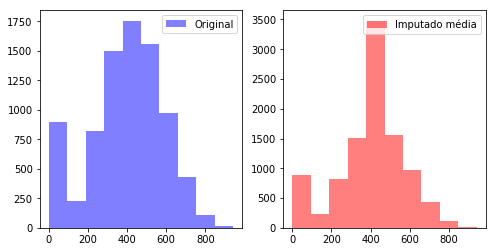

In [33]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(enade.nt_ger.dropna(), label = "Original", alpha = .5, color="blue")
ax[1].hist(NGT.nt_ger, label = "Imputado média", alpha = .5, color="red")
ax[0].legend()
ax[1].legend()
plt.show()

In [0]:
# Agora vamos imputar a mediana
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

In [36]:
ntmedian = imp_median.fit_transform(enade[["nt_ger", "nu_idade"]])
ntmedian = pd.DataFrame(ntmedian, columns=["nt_ger", "nu_idade"])
ntmedian

,nt_ger,nu_idade
0,421.0,36.0
1,357.0,23.0
2,414.0,27.0
3,414.0,20.0
4,598.0,24.0
5,292.0,46.0
6,414.0,38.0
7,642.0,24.0
8,598.0,26.0
9,443.0,36.0


In [37]:
pd.concat([enade.nt_ger, ntmedian.nt_ger], axis=1).describe()

,nt_ger,nt_ger
count,8276.000000,10000.000000
mean,399.618536,402.097900
std,184.300570,167.749122
min,0.000000,0.000000
25%,292.000000,321.000000
50%,414.000000,414.000000
75%,528.000000,503.000000
max,943.000000,943.000000


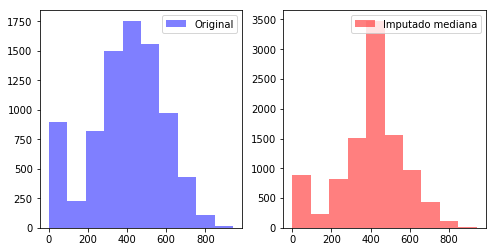

In [38]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].hist(enade.nt_ger.dropna(), label = "Original", alpha = .5, color="blue")
ax[1].hist(ntmedian.nt_ger, label = "Imputado mediana", alpha = .5, color="red")
ax[0].legend()
ax[1].legend()
plt.show()

In [0]:
# Agora vamos imputar o valor mais comuns(moda)
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [42]:
enade.qe_i2.isna().sum() # número menor do que númro de pessoas que faltaram pois a resposta de cor da pele é feita de forma online

1306

In [44]:
# Com a estratégia da moda é possível imputar a variável string
ntmode = imp_mode.fit_transform(enade[["nt_ger", "qe_i2"]])
ntmode

array([[421.0, 'c'],
       [357.0, 'a'],
       [422.0, 'c'],
       ...,
       [422.0, 'a'],
       [47.0, 'c'],
       [208.0, 'c']], dtype=object)

In [45]:
ntmode = pd.DataFrame(ntmode, columns=["nt_ger", "qe_i2"])
ntmode.nt_ger = pd.to_numeric(ntmode.nt_ger)
ntmode.head()

,nt_ger,qe_i2
0,421.0,c
1,357.0,a
2,422.0,c
3,422.0,a
4,598.0,a


In [46]:
pd.concat([enade.nt_ger, ntmode.nt_ger], axis=1).describe()    

,nt_ger,nt_ger
count,8276.000000,10000.000000
mean,399.618536,403.477100
std,184.300570,167.874163
min,0.000000,0.000000
25%,292.000000,321.000000
50%,414.000000,422.000000
75%,528.000000,503.000000
max,943.000000,943.000000


In [0]:
categorias = ["a", "b", "c", "d", "e"]
original = enade.qe_i2.value_counts()
original = [original[0], original[2], original[1], original[3], original[4]]
original

transf = ntmode.qe_i2.value_counts()
transf = [transf[0], transf[2], transf[1], transf[3], transf[4]]

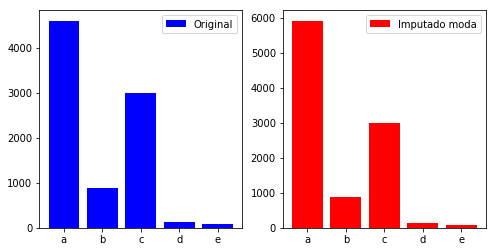

In [50]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].bar(categorias, original, label = "Original", color="blue")
ax[1].bar(categorias,transf, label = "Imputado moda", color="red")
ax[0].legend()
ax[1].legend()
plt.show()